In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.consolidated import *
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from trace_data.graph_list_from_trace import *
from machine_modifications.random_graph_functions import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
task_list = [5*i for i in range(1, 50)]
num_machines = 3

In [3]:
#all-fork
mrt = True
tie_breaking_rule = 2
plot = False
num = 5
x = []
fork_naive_1 = []
fork_naive_2 = []
for num_tasks in task_list:
    counter = 0
    while counter != 20:     
        G = random_all_fork(num_tasks)
 
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]
        naive1, heuristic, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=1, iterations=1)
        naive2, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2, iterations=1)
        
        x.append(num_tasks)
        
        fork_naive_1.append(naive1/heuristic)
        fork_naive_2.append(naive2/heuristic)
        counter += 1

8082460
5056210
9163325
7691577
7017472
3408654
6865915
9568133
2751873
5268153
5145594
4151173
4561673
4224903
6409017
7922379
919389
6685371
5269421
9819144
13189
5437917
3376195
3710907
2056814
4621687
6238366
3993537
2908335
3032138
5602210
6137257
852221
8394362
4628261
3250529
7565247
4734419
530866
7955762
9697327
5630511
2450627
6763483
3512159
4549767
5203834
3826659
3108509
731214
7230852
4212575
2136126
7586741
463089
1291382
3987548
9173431
3866791
4854457
1080783
663241
1387346
1516934
5187068
7942063
2419287
7686186
4474103
171513
1217275
4501668
8514343
7265213
2989941
8633179
5792551
7734151
3447812
1351710
3591933
4538302
1024121
9566648
9488424
8200324
1013079
7958522
2906765
7601641
9806187
1795830
3481352
7071184
4837478
6385986
8422056
6419690
2171470
5746532
1022808
2526311
5753394
1618651
9201493
9428113
6019491
9276831
6652006
3025026
5021856
1234826
1454268
5836035
5203388
7767222
9204816
7484760
692941
9636185
8687361
1611430
2541629
5811094
9349618
5611948
20

In [4]:
#all-join
mrt = True
tie_breaking_rule = 2
plot = False
join_naive_1 = []
join_naive_2 = []
ratio_join = []
for num_tasks in task_list:
    counter = 0
    while counter != 20:
        G = random_all_join(num_tasks)
 
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]
        naive1, heuristic, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=1, iterations=1)
        naive2, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2, iterations=1)
        join_naive_1.append(naive1/heuristic)
        join_naive_2.append(naive2/heuristic)
        counter += 1

2746922
9739138
9417097
3708382
7832928
5127343
5051700
7425388
4521007
559950
4001605
8221345
4108787
9632209
5630230
8593066
7720275
7973561
4285785
5953492
5290822
38807
8069972
2068510
6984719
8283174
8420765
9810482
9988052
6143255
1779465
8423246
8148092
3200210
4011647
8753666
6387554
9803694
1861778
668457
5759139
6381257
5029053
4447716
2863269
378778
5103241
5006045
8207384
3209608
5618047
9375113
2515269
1091907
9304877
700057
3692108
6612609
140
506463
9508070
5843791
5763270
7664247
7263059
4263243
3916924
3484678
1101494
9525419
5675762
3753668
7834794
7042077
1397319
1236982
1434387
4525846
3043582
2584605
3379205
6530426
4795997
6115264
9214891
1900645
2568062
6763661
5657899
2445997
8997900
6423565
4961520
8633866
1344684
7504732
8944364
1353940
9332459
4464268
1505844
1193391
3226111
6856797
1412133
3251742
1251138
6013035
2319525
7623780
7382304
5035895
4666765
1831675
9208230
6262657
4205469
4643809
3108079
1351736
1285149
9526301
9150555
1601369
1614475
2001625
570

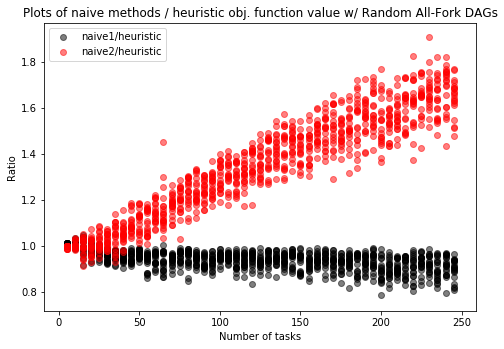

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.scatter(x, fork_naive_1, label='naive1/heuristic', color='k', alpha = 0.5)
plt.scatter(x, fork_naive_2, label='naive2/heuristic', color='r', alpha = 0.5)
plt.xlabel('Number of tasks')
plt.ylabel('Ratio')
plt.legend()
plt.title("Plots of naive methods / heuristic obj. function value w/ Random All-Fork DAGs")
plt.show()

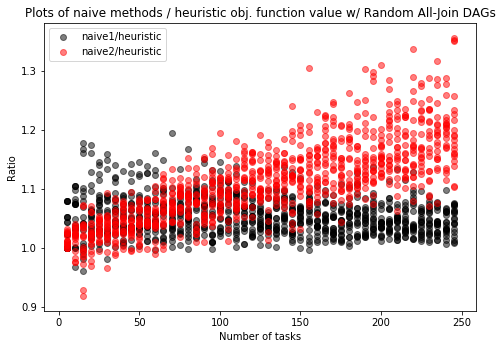

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Plots of naive methods / heuristic obj. function value w/ Random All-Join DAGs")
plt.scatter(x, join_naive_1, label='naive1/heuristic', color='k', alpha = 0.5)
plt.scatter(x, join_naive_2, label='naive2/heuristic', color='r', alpha = 0.5)
plt.xlabel('Number of tasks')
plt.ylabel('Ratio')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


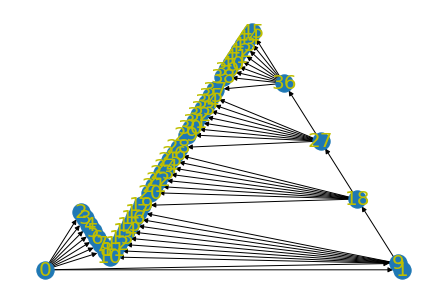

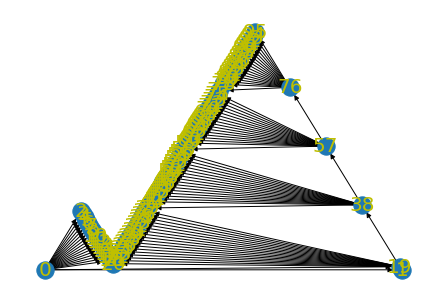

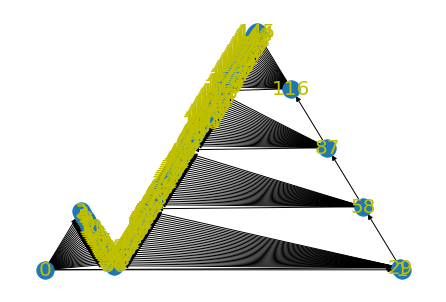

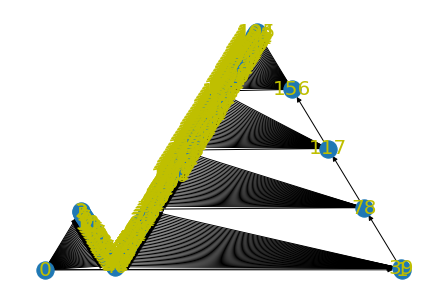

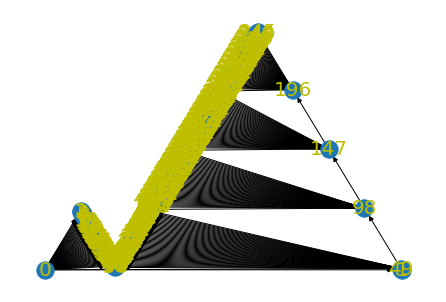

In [7]:
#all-fork STACKING
mrt = True
tie_breaking_rule = 2
plot = False

x_5 = []
ratio_fork_stack_5 = []
for num_children in [10, 20, 30, 40, 50]:
    counter = 0
    while counter != 1:
        
        edges = []
        root = 0
        label = 0
        
        for _ in range(5):
            for i in range(num_children-1):
                label += 1
                edges.append((root, label))    
            root = label
            
        num_tasks =  label + 1
        num_machines = num_children
        
        x_5.append(num_tasks)    
        G = constructGraph(num_tasks, edges, plot=True)
 
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]
        naive1, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=1, iterations=1)
        naive2, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2, iterations=1)
        
        ratio_fork_stack_5.append(naive1/naive2)

        counter += 1
        
        
x_10 = []
ratio_fork_stack_10 = []
for num_children in [10, 20, 30, 40, 50]:
    counter = 0
    while counter != 1:
        
        edges = []
        root = 0
        label = 0
        
        for _ in range(10):
            for i in range(num_children-1):
                label += 1
                edges.append((root, label))    
            root = label
            
        num_tasks =  label + 1
        num_machines = num_children
        
        x_10.append(num_tasks)    
        G = constructGraph(num_tasks, edges, plot=False)
 
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]
        naive1, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=1, iterations=1)
        naive2, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2, iterations=1)
        
        ratio_fork_stack_10.append(naive1/naive2)

        counter += 1
        
x_20 = []
ratio_fork_stack_20 = []
for num_children in [10, 20, 30, 40, 50]:
    counter = 0
    while counter != 1:
        
        edges = []
        root = 0
        label = 0
        
        for _ in range(20):
            for i in range(num_children-1):
                label += 1
                edges.append((root, label))    
            root = label
            
        num_tasks =  label + 1
        num_machines = num_children
        
        x_20.append(num_tasks)    
        G = constructGraph(num_tasks, edges, plot=False)
 
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]
        naive1, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=1, iterations=1)
        naive2, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2, iterations=1)
        
        ratio_fork_stack_20.append(naive1/naive2)

        counter += 1
        
x_30 = []
ratio_fork_stack_30 = []
for num_children in [10, 20, 30, 40, 50]:
    counter = 0
    while counter != 1:
        
        edges = []
        root = 0
        label = 0
        
        for _ in range(30):
            for i in range(num_children-1):
                label += 1
                edges.append((root, label))    
            root = label
            
        num_tasks =  label + 1
        num_machines = num_children
        
        x_30.append(num_tasks)    
        G = constructGraph(num_tasks, edges, plot=False)
 
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]
        naive1, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=1, iterations=1)
        naive2, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2, iterations=1)
        
        ratio_fork_stack_30.append(naive1/naive2)

        counter += 1

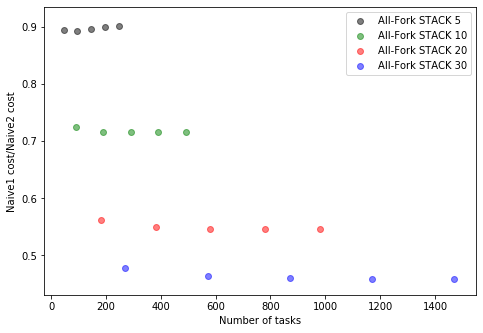

In [8]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.scatter(x_5, ratio_fork_stack_5, label='All-Fork STACK 5', color='k', alpha = 0.5)
plt.scatter(x_10, ratio_fork_stack_10, label='All-Fork STACK 10', color='g', alpha = 0.5)
plt.scatter(x_20, ratio_fork_stack_20, label='All-Fork STACK 20', color='r', alpha = 0.5)
plt.scatter(x_30, ratio_fork_stack_30, label='All-Fork STACK 30', color='b', alpha = 0.5)

plt.xlabel('Number of tasks')
plt.ylabel('Naive1 cost/Naive2 cost')
plt.legend()
plt.show()

In [9]:
#all-fork STACKING
mrt = True
tie_breaking_rule = 2
plot = False

x_5 = []
ratio_fork_stack_5 = []
for num_children in [10, 20, 30, 40, 50]:
    counter = 0
    while counter != 1:
        
        edges = []
        root = 0
        label = 0
        
        for _ in range(5):
            for i in range(num_children-1):
                label += 1
                edges.append((label, root))    
            root = label
            
        num_tasks =  label + 1
        num_machines = num_children
        
        x_5.append(num_tasks)    
        G = constructGraph(num_tasks, edges, plot=False)
 
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]
        naive1, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=1, iterations=1)
        naive2, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2, iterations=1)
        
        ratio_fork_stack_5.append(naive1/naive2)

        counter += 1
        
        
x_10 = []
ratio_fork_stack_10 = []
for num_children in [10, 20, 30, 40, 50]:
    counter = 0
    while counter != 1:
        
        edges = []
        root = 0
        label = 0
        
        for _ in range(10):
            for i in range(num_children-1):
                label += 1
                edges.append((label, root))    
            root = label
            
        num_tasks =  label + 1
        num_machines = num_children
        
        x_10.append(num_tasks)    
        G = constructGraph(num_tasks, edges, plot=False)
 
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]
        naive1, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=1, iterations=1)
        naive2, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2, iterations=1)
        
        ratio_fork_stack_10.append(naive1/naive2)

        counter += 1
        
x_20 = []
ratio_fork_stack_20 = []
for num_children in [10, 20, 30, 40, 50]:
    counter = 0
    while counter != 1:
        
        edges = []
        root = 0
        label = 0
        
        for _ in range(20):
            for i in range(num_children-1):
                label += 1
                edges.append((label, root))    
            root = label
            
        num_tasks =  label + 1
        num_machines = num_children
        
        x_20.append(num_tasks)    
        G = constructGraph(num_tasks, edges, plot=False)
 
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]
        naive1, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=1, iterations=1)
        naive2, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2, iterations=1)
        
        ratio_fork_stack_20.append(naive1/naive2)

        counter += 1
        
x_30 = []
ratio_fork_stack_30 = []
for num_children in [10, 20, 30, 40, 50]:
    counter = 0
    while counter != 1:
        
        edges = []
        root = 0
        label = 0
        
        for _ in range(30):
            for i in range(num_children-1):
                label += 1
                edges.append((label, root))    
            root = label
            
        num_tasks =  label + 1
        num_machines = num_children
        
        x_30.append(num_tasks)    
        G = constructGraph(num_tasks, edges, plot=False)
 
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]
        naive1, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=1, iterations=1)
        naive2, _, _ = iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2, iterations=1)
        
        ratio_fork_stack_30.append(naive1/naive2)

        counter += 1

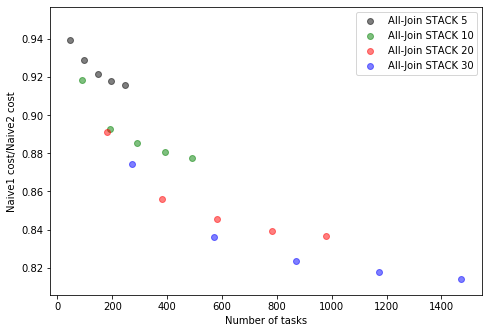

In [10]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.scatter(x_5, ratio_fork_stack_5, label='All-Join STACK 5', color='k', alpha = 0.5)
plt.scatter(x_10, ratio_fork_stack_10, label='All-Join STACK 10', color='g', alpha = 0.5)
plt.scatter(x_20, ratio_fork_stack_20, label='All-Join STACK 20', color='r', alpha = 0.5)
plt.scatter(x_30, ratio_fork_stack_30, label='All-Join STACK 30', color='b', alpha = 0.5)

plt.xlabel('Number of tasks')
plt.ylabel('Naive1 cost/Naive2 cost')
plt.legend()
plt.show()